In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from investigation_functions import ml_visualisation_funcs as mvf

In [2]:
df_svm_4q = pd.read_csv('../ML_results/SVM/svm_4q.csv')
df_svm_8q = pd.read_csv('../ML_results/SVM/svm_8q.csv')

select the circuit table tests

In [3]:
df_svm_4q = df_svm_4q[df_svm_4q['tr&v circuits'] != 111]
df_svm_8q = df_svm_8q[df_svm_8q['tr&v circuits'] != 111]

df_svm_4q_ct = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_4q,False)
df_svm_8q_ct = mvf.get_df_with_same('tr&v exp_type','test exp_type',df_svm_8q,False)

## Train c1

test circuits are:
- c1 = 100
- c2 = 010
- c3 = 001
- c23 = 011

In [4]:
df_svm_4q_ct1 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']==100]
df_svm_8q_ct1 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']==100]

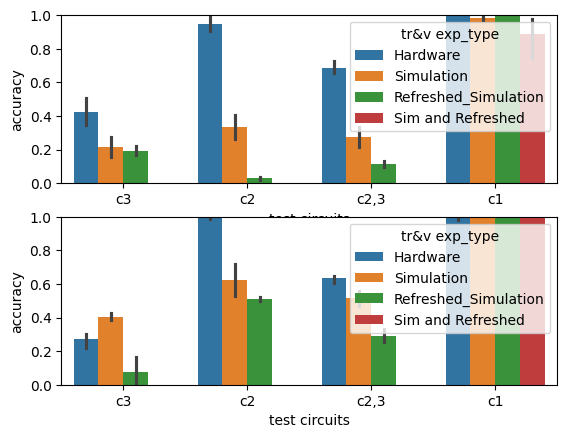

In [6]:
labels = ["c3","c2","c2,3","c1"]
plt.subplot(211)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_ct1, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.subplot(212)
ax_bva_8qs=sns.barplot(
    df_svm_8q_ct1, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels)

plt.show()

### Observation
In general accuracy is higher with 8 qubits than 4 qubits.

C1 on C1 is the highest accuracy over all experiment types.
Testing on C2 has a much higher accuracy than testing on c3. This makes sense becuase c1 and c2 are very similar circuits.

Theoretically, the c2,c3 results are the average of the the c2 and c3 results. This shpuld be calculated and tested.

Interestingly c3 accuracy is higher with 4 qubits than with 8 qubits.

Generally accuracy by experiment type in descending order is Hardware, Simulation, Refreshed Simulation. - double check which mode was used for these runs


## Train c2

test circuits are:
- c1 = 100
- c2 = 010
- c3 = 001
- c1,3 = 101

In [8]:
df_svm_4q_ct2 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']== 10]
df_svm_8q_ct2 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']== 10]

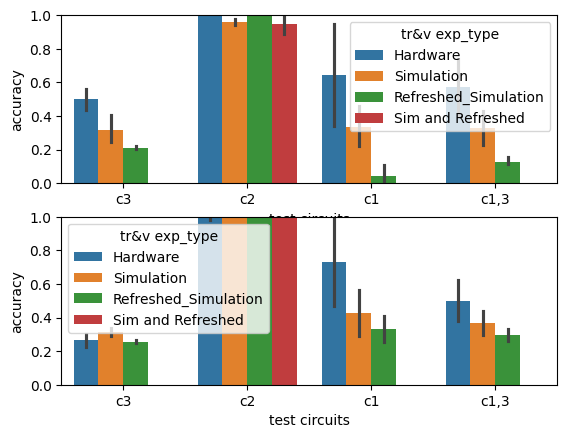

In [9]:
labels_c2 = ["c3","c2","c1","c1,3"]
plt.subplot(211)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_ct2, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,4),labels=labels_c2)

plt.subplot(212)
ax_bva_8qs=sns.barplot(
    df_svm_8q_ct2, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels_c2)

plt.show()

### Observation
In general accuracy is higher with 8 qubits than 4 qubits, again. The refreshed simulation in particular performs better with more qubits. ... what would that mean?

C2 on C2 is the highest accuracy over all experiment types.
Testing on C1 has a higher accuracy than testing on c3. This makes sense becuase c1 and c2 are very similar circuits. But this difference is less noticeable when trained on C2 - possibly because C2 has more gates so is more generalised?

Theoretically, the c1,c3 results are the average of the the c1 and c3 results. This should be calculated and tested.

Generally accuracy by experiment type in descending order is Hardware, Simulation, Refreshed Simulation. - double check which mode was used for these runs

## Train c3

test circuits are:
- c1 = 100
- c2 = 010
- c3 = 001
- c1,2 = 110

In [10]:
df_svm_4q_ct3 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']== 1]
df_svm_8q_ct3 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']== 1]

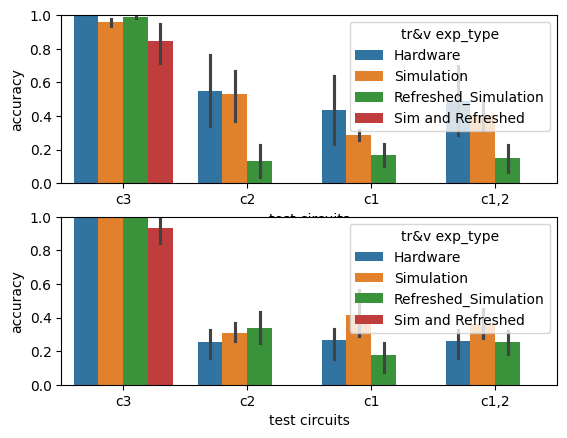

In [11]:
labels_c3 = ["c3","c2","c1","c1,2"]
plt.subplot(211)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_ct3, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,4),labels=labels_c3)

plt.subplot(212)
ax_bva_8qs=sns.barplot(
    df_svm_8q_ct3, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_bva_8qs.set_ylim(tuple([0,1]))
ax_bva_8qs.set_xticks(ticks = np.arange(0,4),labels=labels_c3)

plt.show()

### Observation
In general accuracy is higher with 8 qubits than 4 qubits for c3 on c3, but for testing on any of the other circuits, accuracy is higher with 4 qubits. 

Strangely Hardware performs a lot better with 4 qubits than 8 qubits. The In the 8 qubit regime, Simulation performs the best, but is probably still a downgrade from 4q Simulation accuracy. Weirdly Refreshed simulation is the only mode that improves with the 8q runs.

Theoretically, the c1,c3 results are the average of the the c1 and c3 results. This should be calculated and tested.

## Train on 2 circuits, test on 1

In [12]:
#train_list =[110, 101, 11]
df_svm_4q_ct12 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']==110]
df_svm_8q_ct12 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']==110]

df_svm_4q_ct13 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']==101]
df_svm_8q_ct13 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']==101]

df_svm_4q_ct23 = df_svm_4q_ct[df_svm_4q_ct['tr&v circuits']==11]
df_svm_8q_ct23 = df_svm_8q_ct[df_svm_8q_ct['tr&v circuits']==11]

4 qubits:

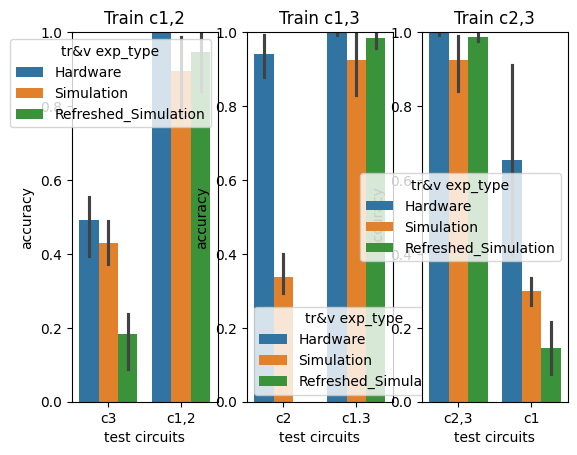

In [21]:
#labels_c3 = ["c3","c2","c1","c1,2"]
plt.subplot(131)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_ct12, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,2),labels=["c3","c1,2"])
ax_ct1_4qs.set_title("Train c1,2")


plt.subplot(132)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_ct13, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,2),labels=["c2","c1.3"])
ax_ct1_4qs.set_title("Train c1,3")

plt.subplot(133)
ax_ct1_4qs =sns.barplot(
    df_svm_4q_ct23, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,2),labels=["c2,3","c1"])
ax_ct1_4qs.set_title("Train c2,3")

plt.show()

### 4q Observations

...

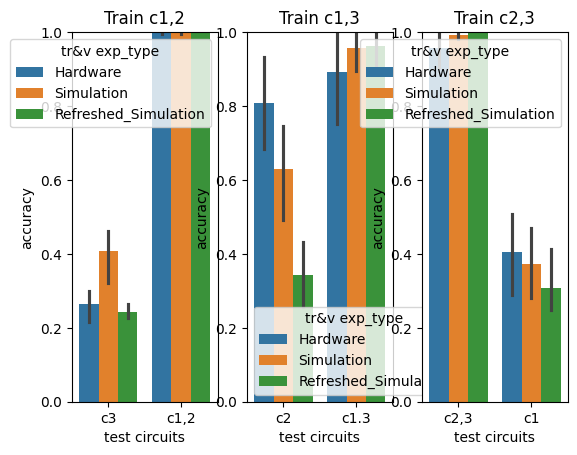

In [22]:
plt.subplot(131)
ax_ct1_4qs =sns.barplot(
    df_svm_8q_ct12, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,2),labels=["c3","c1,2"])
ax_ct1_4qs.set_title("Train c1,2")


plt.subplot(132)
ax_ct1_4qs =sns.barplot(
    df_svm_8q_ct13, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,2),labels=["c2","c1.3"])
ax_ct1_4qs.set_title("Train c1,3")

plt.subplot(133)
ax_ct1_4qs =sns.barplot(
    df_svm_8q_ct23, x = 'test circuits', y = 'accuracy',
    hue = 'tr&v exp_type')
ax_ct1_4qs.set_ylim(tuple([0,1]))
ax_ct1_4qs.set_xticks(ticks = np.arange(0,2),labels=["c2,3","c1"])
ax_ct1_4qs.set_title("Train c2,3")

plt.show()
